In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [3]:
df = sqlc.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true').load('iris.csv')
df.show(5)


+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [4]:
from pyspark.sql.functions import mean
avg_sl = df.select(mean('sepal_length')).toPandas()['avg(sepal_length)']


In [5]:
y = df
y = y.na.fill(float(avg_sl),['sepal_length'])
y.describe().show(1)


+-------+------------+-----------+------------+-----------+-------+
|summary|sepal_length|sepal_width|petal_length|petal_width|species|
+-------+------------+-----------+------------+-----------+-------+
|  count|         150|        150|         150|        150|    150|
+-------+------------+-----------+------------+-----------+-------+
only showing top 1 row



In [6]:
from pyspark.mllib.stat import Statistics
import pandas as pd


In [7]:
z = y.fillna(1)

In [8]:
a = z.drop('species') 
features = a.rdd.map(lambda row: row[0:])


In [9]:
correlation_matrix = Statistics.corr(features, method="pearson")

In [10]:
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.index, correlation_df.columns = a.columns, a.columns
correlation_df


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [11]:
import pandas as pd
dat = y.toPandas()
type(dat)


pandas.core.frame.DataFrame

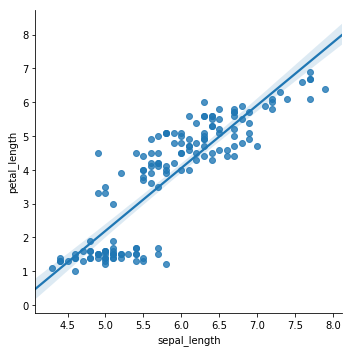

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "sepal_length", y = "petal_length", data = dat)
plt.show()


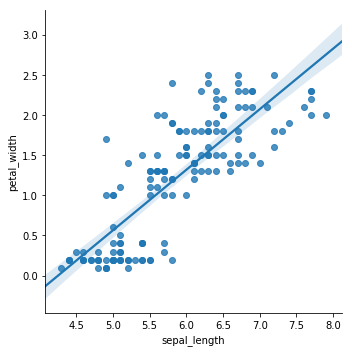

In [13]:
import seaborn as sns
sns.lmplot(x = "sepal_length", y = "petal_width", data = dat)
plt.show()


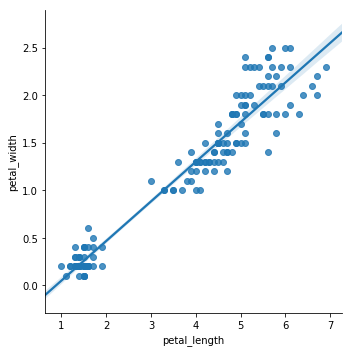

In [14]:
sns.lmplot(x = "petal_length", y = "petal_width", data = dat)
plt.show()
